# Confidence Intervals

### Confidence interval by hand

There are two common ways that interviewers will touch on confidence intervals; they will either ask you to explain it in simple terms, or elaborate on how they are calculated, possibly having you implement one. In this exercise, you'll practice the latter by producing a confidence interval by hand, using no packages other than those imported for you.

We have gone ahead and assigned the appropriate z-score for a 95% confidence interval and sample mean to the z_score and sample_mean variables to simplify things a bit.

**Instructions**

- Compute the standard error and the margin of error using the sem() function and z_score variable imported for you.

- Compute and print the lower boundary of our confidence interval using the sample_mean variable imported for you.

- Compute and print the upper boundary of our confidence interval using the sample_mean variable imported for you.

In [4]:
from scipy.stats import sem, t
data = [1, 2, 3, 4, 5]
confidence = 0.95
sample_mean = sum(data) / len(data)
print(sample_mean)

# Compute the standard error and margin of error
std_err = sem(data)
margin_error = std_err * 1.96

# Compute and print the lower threshold
lower = sample_mean - margin_error
print(lower)

# Compute and print the upper threshold
upper = sample_mean + margin_error
print(upper)

3.0
1.6140707088743669
4.385929291125633


Good work showing your understanding of how confidence intervals are calculated! Now you'll be prepared if interviewers ever throw this at you in a coding assessment. Don't forget about the conceptual understanding, though. Make sure you're comfortable explaining confidence intervals to a beginner in an intuitive way.

### Applying confidence intervals

In practice, you aren't going to hand-code confidence intervals. Let's utilize the statsmodels package to streamline this process and examine some more tendencies of interval estimates.

In this exercise, we've generated a binomial sample of the number of heads in 50 fair coin flips saved as the heads variable. You'll compute a few different confidence intervals for this sample, and then scale your work for 10 similar samples.

The proportion_confint() function has already been imported to help you compute confidence intervals.

**Instructions**

- Compute and print a 99% confidence interval for 50 trials; does it contain the true proportion of a fair coin flip?

- Adapt your code to generate a 90% confidence interval this time; does it contain the true proportion this time?

Examine your confidence interval results from the last step. You might see at least one confidence interval that does not contain 0.5, the true population proportion for a fair coin flip. You could decrease the likelihood of this happening by increasing your confidence level or lowering the alpha value.

- Repeat this process of sampling, computing the confidence interval, and printing the result 10 times using a loop.

In [5]:
def two_proprotions_confint(success_a, size_a, success_b, size_b, significance = 0.05):
    """
    A/B test for two proportions;
    given a success a trial size of group A and B compute
    its confidence interval;
    resulting confidence interval matches R's prop.test function

    Parameters
    ----------
    success_a, success_b : int
        Number of successes in each group

    size_a, size_b : int
        Size, or number of observations in each group

    significance : float, default 0.05
        Often denoted as alpha. Governs the chance of a false positive.
        A significance level of 0.05 means that there is a 5% chance of
        a false positive. In other words, our confidence level is
        1 - 0.05 = 0.95

    Returns
    -------
    prop_diff : float
        Difference between the two proportion

    confint : 1d ndarray
        Confidence interval of the two proportion test
    """
    prop_a = success_a / size_a
    prop_b = success_b / size_b
    var = prop_a * (1 - prop_a) / size_a + prop_b * (1 - prop_b) / size_b
    se = np.sqrt(var)

    # z critical value
    confidence = 1 - significance
    z = stats.norm(loc = 0, scale = 1).ppf(confidence + significance / 2)

    # standard formula for the confidence interval
    # point-estimtate +- z * standard-error
    prop_diff = prop_b - prop_a
    confint = prop_diff + np.array([-1, 1]) * z * se
    return prop_diff, confint

In [ ]:
# Compute and print the 99% confidence interval
confidence_int = two_proprotions_confint(heads, 50, 0.01)
print(confidence_int)

In [ ]:
# Compute and print the 90% confidence interval
confidence_int = proportion_confint(heads, 50, 0.1)
print(confidence_int)

In [ ]:
# Repeat this process 10 times 
heads = binom.rvs(50, 0.5, size=10)
for val in heads:
    confidence_interval = proportion_confint(val, 50, .10)
    print(confidence_interval)

### One tailed z-test

We know now that hypothesis tests can come in several forms. In this exercise, you'll implement a one tailed z-test on test data from tracking conversion on a mobile app. The data has been imported as results and numpy has already been imported for you along with pandas as well.

The treatment group represents some graphic alteration that we expect to improve the conversion rate of users. Run a test with alpha as .05 and find out if the change actually helped.

**Instructions**

- Assign and print the mean conversion rate for each group using the groupby() function on the Group column.

- Assign the number of control conversions to num_control and the total number of trials to the total_control variable by slicing the DataFrame.

- Similarly, assign the same values for the treatment group by slicing the DataFrame.

- Run the z-test using the proportions_ztest() function and passing it the count and nobs variables.

In [7]:
results = pd.read_csv('ab_data.csv')
results.head()

<IPython.core.display.Javascript object>

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [8]:
# Assign and print the conversion rate for each group
conv_rates = results.groupby('group').mean()
print(conv_rates)

                 user_id  converted
group                              
control    788123.098035   0.120399
treatment  787825.226283   0.118920


In [9]:
# Assign the number of control conversions and trials
num_control = results[results['group'] == 'control']['converted'].sum()
total_control = len(results[results['group'] == 'control'])

print('num_control :', num_control)
print('total_control :', total_control)

num_control : 17723
total_control : 147202


In [10]:
# Assign the number of conversions and total trials
num_treat = results[results['group'] == 'treatment']['converted'].sum()
total_treat = len(results[results['group'] == 'treatment'])

print('num_treat :', num_treat)
print('total_treat :', total_treat)

num_treat : 17514
total_treat : 147276


In [11]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([num_treat, num_control]) 
nobs = np.array([total_treat, total_control])

# Run the z-test and print the result 
stat, pval = proportions_ztest(count, nobs, alternative="larger")
print('{0:0.3f}'.format(pval))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.892


Good job! You see that our test gave us a resulting p-value of .009 which falls under our alpha value of .05, so we can conclude that there is an effect and, therefore, we reject the null hypothesis. It looks like the change actually did have a noticeable positive effect on conversion rate!

### Two tailed t-test

In this exercise, you'll tackle another type of hypothesis test with the two tailed t-test for means. More concretely, you'll run the test on our laptops dataset from before and try to identify a significant difference in price between Asus and Toshiba.

Once again, we've imported all of the standard packages. Once you get your result, don't forget to make an actionable conclusion.

**Instructions**

- Assign and print the mean price for each group using the groupby() function on the Company feature.

- Assign the prices of each group to their respective variable.

- Run the t-test and print the results using the imported ttest_ind() function; what's your conclusion?

In [12]:
laptops = pd.read_csv('laptops.csv', sep=',', encoding='latin-1')
laptops.drop('Unnamed: 0', axis=1, inplace=True)
laptops.head(1)

<IPython.core.display.Javascript object>

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69


In [13]:
# Display the mean price for each group
prices = laptops.groupby('Company').mean()
print(prices)

              Inches  Price_euros
Company                          
Acer       15.063107   626.775825
Apple      13.247619  1564.198571
Asus       15.450000  1104.169367
Chuwi      14.500000   314.296667
Dell       15.136027  1186.068990
Fujitsu    15.600000   729.000000
Google     12.300000  1677.666667
HP         14.943066  1067.774854
Huawei     13.000000  1424.000000
LG         15.066667  2099.000000
Lenovo     14.872727  1086.384444
MSI        16.442593  1728.908148
Mediacom   13.457143   295.000000
Microsoft  13.500000  1612.308333
Razer      14.514286  3346.142857
Samsung    13.822222  1413.444444
Toshiba    14.354167  1267.812500
Vero       13.825000   217.425000
Xiaomi     14.450000  1133.462500


In [14]:
# Assign the prices of each group
asus = laptops[laptops['Company'] == 'Asus']['Price_euros']
toshiba = laptops[laptops['Company'] == 'Toshiba']['Price_euros']

In [15]:
# Run the t-test
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(asus, toshiba)
print('{0:0.3f}'.format(pval))

0.133


With a p-value of .133, we cannot reject the null hypothesis! There's not enough evidence here to conclude that Toshiba laptops are significantly more expensive than Asus. With that being said, .133 is fairly close to reasonable significance so we may want to run another test or examine this further. Interviewers won't hesitate to throw you tricky situations like this to see how you handle them. Come to a conclusion and make a strong argument for it. Good job!

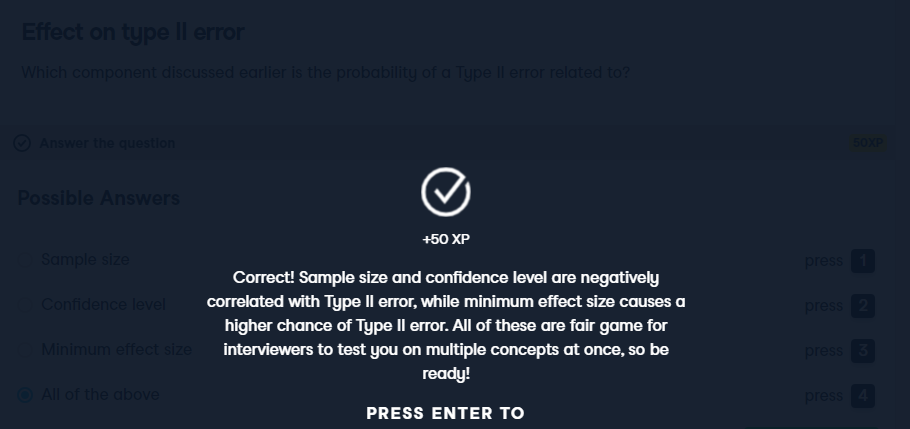

### Calculating sample size

Let's finish up our dive into statistical tests by performing power analysis to generate needed sample size. Power analysis involves four moving parts:

- Sample size

- Effect size

- Minimum effect

- Power

In this exercise, you're working with a website and want to test for a difference in conversion rate. Before you begin the experiment, you must decide how many samples you'll need per variant using 5% significance and 95% power.

**Instructions**

- Standardize the effect of a conversion rate increase from 20% to 25% success using the proportion_effectsize() function.

- Calculate and print the needed sample size using the zt_ind_solve_power() function.

- Adapt your code to solve for needed sample size using 80% power instead; observe what happens

In [16]:
# Standardize the effect size
from statsmodels.stats.proportion import proportion_effectsize
std_effect = proportion_effectsize(.20, .25)
std_effect

-0.11990233319498567

In [17]:
# Assign and print the needed sample size
from statsmodels.stats.power import  zt_ind_solve_power
sample_size = zt_ind_solve_power(effect_size=std_effect, nobs1=None, alpha=0.05, power=0.95)
print(sample_size)

1807.7621477153257


In [18]:
# Assign and print the needed sample size
from statsmodels.stats.power import  zt_ind_solve_power
sample_size = zt_ind_solve_power(effect_size=std_effect, nobs1=None, alpha=.05, power=0.80)
print(sample_size)

1091.8961587171943


All done! Notice how lowering the power allowed you fewer observations in your sample, yet increased your chance of a Type II error. Remember that doing these calculations by hand is quite difficult, so you may be asked to show or explain these tradeoffs with whiteboarding rather than programming.

### Visualizing the relationship

Now that we've gone over the effect on certain errors and calculated the necessary sample size for different power values, let's take a step back and look at the relationship between power and sample size with a useful plot.

In this exercise, we'll switch gears and look at a t-test rather than a z-test. In order to visualize this, use the plot_power() function that shows sample size on the x-axis with power on the y-axis and different lines representing different minimum effect sizes.

**Instructions**

- Assign a TTestIndPower() object to the results variable.

- Visualize the relationship between power and sample size using the plot_power() function with the appropriate parameter values; what do you notice?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

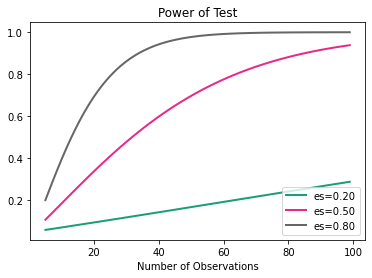

In [19]:
sample_sizes = np.array(range(5, 100))
effect_sizes = np.array([0.2, 0.5, 0.8])

# Create results object for t-test analysis
from statsmodels.stats.power import TTestIndPower
results = TTestIndPower(nobs= sample_sizes, effect_size = effect_sizes)

# Plot the power analysis
results.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

Good work! Notice that not only does an increase in power result in a larger sample size, but this increase grows exponentially as the minimum effect size is increased. Once again, power analysis can get confusing with all of these interconnected moving parts, but by mastering the relationships at hand, you'll be ready when the question comes up from your interviewer!

## Multiple testing

### Calculating error rates

We talked a bit about the multiple comparisons problem in the slides, but let's take things a step further. In this exercise, you'll look into how the phenomenon affects error rate more precisely.

Your colleague is strongly considering running 60 distinct hypothesis tests. In order to convince them otherwise, compute the probability of a Type I error for 60 hypothesis tests with a single-test 5% significance level.

**Instructions**

- Compute and print the probability of your colleague getting a Type I error.

- You successfully talked them down to 30 tests; adapt your code to compute and print the new error rate.

- One last try; adapt your code to compute and print the error rate for 10 tests.

In [21]:
# Print error rate for 60 tests with 5% significance
error_rate = 1 - (0.95**(60))
print(error_rate)

0.953930201013048


In [22]:
# Print error rate for 30 tests with 5% significance
error_rate = 1 - (0.95**(30))
print(error_rate)

0.7853612360570628


In [23]:
# Print error rate for 10 tests with 5% significance
error_rate = 1 - (0.95**(10))
print(error_rate)

0.4012630607616213


As you can see, the probability of encountering an error is still extremely high. This is where the Bonferroni correction comes in. While a bit conservative, it controls the family-wise error rate for circumstances like these to avoid the high probability of a Type I error. We'll go over this specific method in the next exercise!


### Bonferroni correction

Let's implement multiple hypothesis tests using the Bonferroni correction approach that we discussed in the slides. You'll use the imported multipletests() function in order to achieve this.

Use a single-test significance level of .05 and observe how the Bonferroni correction affects our sample list of p-values already created.

**Instructions**

- Compute a list of the Bonferroni adjusted p-values using the imported multipletests() function.

- Print the results of the multiple hypothesis tests returned in index 0 of your p_adjusted variable.

- Print the p-values themselves returned in index 1 of your p_adjusted variable.

In [24]:
from statsmodels.sandbox.stats.multicomp import multipletests
pvals = [.01, .05, .10, .50, .99]

# Create a list of the adjusted p-values
p_adjusted = multipletests(pvals, alpha=0.05, method='bonferroni')

# Print the resulting conclusions
print(p_adjusted[0])

# Print the adjusted p-values themselves 
print(p_adjusted[1])

[ True False False False False]
[0.05 0.25 0.5  1.   1.  ]


Good work! As you can see, the Bonferroni correction did it's job and corrected the family-wise error rate for our 5 hypothesis test results. In the end, only one of the tests remained signficant. If you're interested, check out some of the other methods, but interviewers typically won't get too far in the weeds here.